# MODELOS

#### Importar datos y explorar 

In [1]:
import numpy as np
import pandas as pd

In [2]:
#leer archivo limpio 

df = pd.read_csv('airbnb_rio_clean.csv')
#explorar df
df.head()


,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,...,has_pool,has_wifi,has_free_parking,has_ac_heating,has_kitchen,has_jacuzzi,has_washer_dryer,has_self_checkin,has_tv_cable,has_bbq
0,95,97,0.0,10.0,1.0,-22.982818,-43.222457,1.0,4,2.0,...,0,1,1,1,1,0,1,0,1,0
1,100,46,0.0,39.0,1.0,-22.984090,-43.191770,1.0,2,1.0,...,0,1,0,1,1,0,1,0,0,0
2,0,0,0.0,2.0,1.0,-22.814911,-43.379011,1.0,4,1.0,...,0,0,1,1,1,0,1,0,0,1
3,100,71,1.0,1.0,1.0,-23.010000,-43.344820,1.0,4,1.0,...,1,1,1,1,1,0,1,0,0,0
4,100,99,1.0,17.0,1.0,-22.970696,-43.186048,1.0,6,2.0,...,0,1,0,1,1,0,1,0,0,0


In [46]:
df['room_type'].unique()

array([1., 0.])

In [7]:
df.describe()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,room_type,accommodates,bedrooms,...,has_pool,has_wifi,has_free_parking,has_ac_heating,has_kitchen,has_jacuzzi,has_washer_dryer,has_self_checkin,has_tv_cable,has_bbq
count,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,...,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000,36901.000000
mean,75.001192,69.033847,0.366440,22.978781,0.739628,-22.965832,-43.248784,0.816184,3.969323,1.514756,...,0.239885,0.961356,0.434866,0.751335,0.915043,0.062925,0.805696,0.359773,0.277770,0.133438
std,39.562723,36.019191,0.481838,91.576175,0.438844,0.036133,0.101377,0.387339,2.276493,1.021042,...,0.427019,0.192747,0.495746,0.432245,0.278822,0.242832,0.395669,0.479940,0.447906,0.340052
min,0.000000,0.000000,0.000000,1.000000,0.000000,-23.072920,-43.713593,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,49.000000,0.000000,1.000000,0.000000,-22.984355,-43.302300,1.000000,2.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,100.000000,86.000000,0.000000,3.000000,1.000000,-22.971658,-43.193522,1.000000,4.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,100.000000,99.000000,1.000000,9.000000,1.000000,-22.952100,-43.184340,1.000000,5.000000,2.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,100.000000,100.000000,1.000000,2296.000000,1.000000,-22.750510,-43.104400,1.000000,16.000000,27.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
print(df.shape)
print( df.dtypes)
print(df.keys())

(36901, 34)
host_response_rate               int64
host_acceptance_rate             int64
host_is_superhost              float64
host_total_listings_count      float64
host_identity_verified         float64
latitude                       float64
longitude                      float64
room_type                      float64
accommodates                     int64
bedrooms                       float64
beds                           float64
price                          float64
minimum_nights                   int64
maximum_nights                   int64
maximum_minimum_nights         float64
maximum_nights_avg_ntm         float64
availability_365                 int64
availability_eoy                 int64
estimated_occupancy_l365d        int64
review_scores_rating           float64
review_scores_communication    float64
review_scores_location         float64
instant_bookable                 int64
bathroomsf                     float64
has_pool                         int64
has_wifi     

#### Definir variable dependiente del modelo

In [10]:
#Modelo de regresion--> variable y = precio . LISTA de nombre
y_reg= "price"

x_completo_reg=['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'maximum_minimum_nights',
       'maximum_nights_avg_ntm', 'availability_365', 'availability_eoy',
       'estimated_occupancy_l365d',
       'review_scores_communication',"review_scores_rating", 'review_scores_location',
       'instant_bookable', 'bathroomsf', 'has_pool', 'has_wifi',
       'has_free_parking', 'has_ac_heating', 'has_kitchen', 'has_jacuzzi',
       'has_washer_dryer', 'has_self_checkin', 'has_tv_cable', 'has_bbq']
#Modelo de clasificacion --> variable y = rating . LISTA de nombre
y_clas= "review_scores_rating"

x_completo_class=['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price'
       'minimum_nights', 'maximum_nights', 'maximum_minimum_nights',
       'maximum_nights_avg_ntm', 'availability_365', 'availability_eoy',
       'estimated_occupancy_l365d',
       'review_scores_communication', 'review_scores_location',
       'instant_bookable', 'bathroomsf', 'has_pool', 'has_wifi',
       'has_free_parking', 'has_ac_heating', 'has_kitchen', 'has_jacuzzi',
       'has_washer_dryer', 'has_self_checkin', 'has_tv_cable', 'has_bbq']

#x categoricas vs continuas
continuas_reg=['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'maximum_minimum_nights',
       'maximum_nights_avg_ntm', 'availability_365', 'availability_eoy',
       'estimated_occupancy_l365d',
       'review_scores_communication',"review_scores_rating", 'review_scores_location',
        'bathroomsf']

continuas_class=['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'maximum_minimum_nights',
       'maximum_nights_avg_ntm', 'availability_365', 'availability_eoy',
       'estimated_occupancy_l365d',
       'review_scores_communication',"price", 'review_scores_location',
        'bathroomsf']

categoricas= ['host_is_superhost', 'host_identity_verified', 'room_type', 'instant_bookable', 
              'has_pool','has_wifi','has_free_parking',
              'has_ac_heating','has_kitchen','has_jacuzzi',
              'has_washer_dryer','has_self_checkin','has_tv_cable',
              'has_bbq']

## MODELO DE REGRESIÓN

#### Exploracion de variables X importante

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

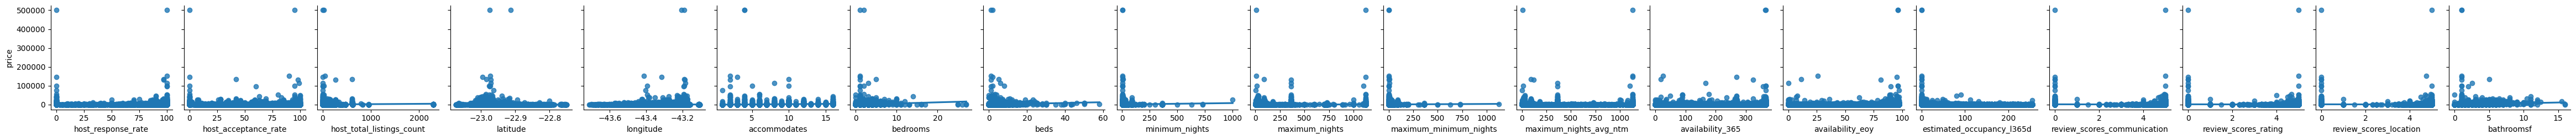

In [ ]:
#paiplot continuas
sns.pairplot(df, x_vars= continuas_reg, y_vars= y_reg, kind='reg') 

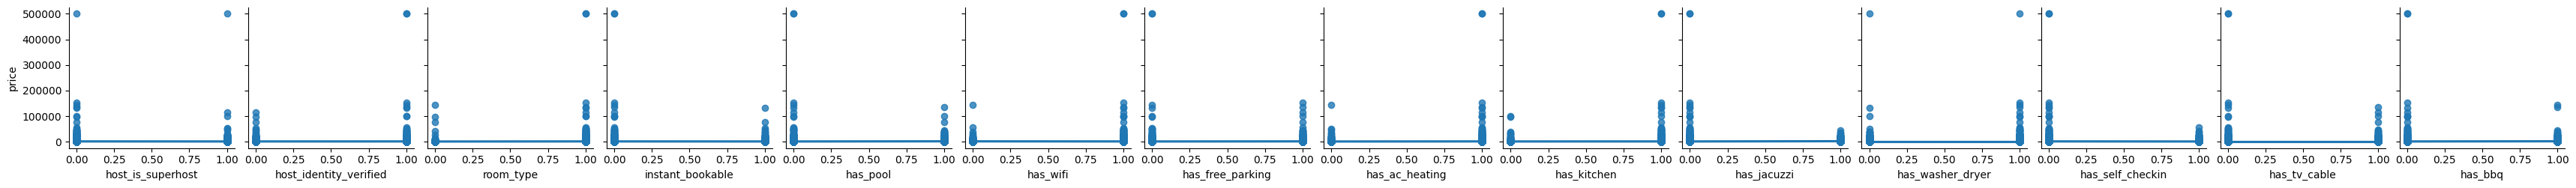

In [8]:
#pairplot discretas
sns.pairplot(df, x_vars= categoricas, y_vars= y_reg, kind='reg') 

#### Analisis variables continuas

price                          1.000000
bathroomsf                     0.163368
bedrooms                       0.137520
accommodates                   0.130895
beds                           0.091196
availability_365               0.047486
availability_eoy               0.034805
host_total_listings_count      0.032450
minimum_nights                 0.023717
maximum_minimum_nights         0.008796
maximum_nights                 0.004665
maximum_nights_avg_ntm        -0.005612
longitude                     -0.013636
host_response_rate            -0.038408
latitude                      -0.043062
estimated_occupancy_l365d     -0.058629
host_acceptance_rate          -0.062470
review_scores_rating          -0.080820
review_scores_location        -0.080975
review_scores_communication   -0.081529
Name: price, dtype: float64


<Axes: >

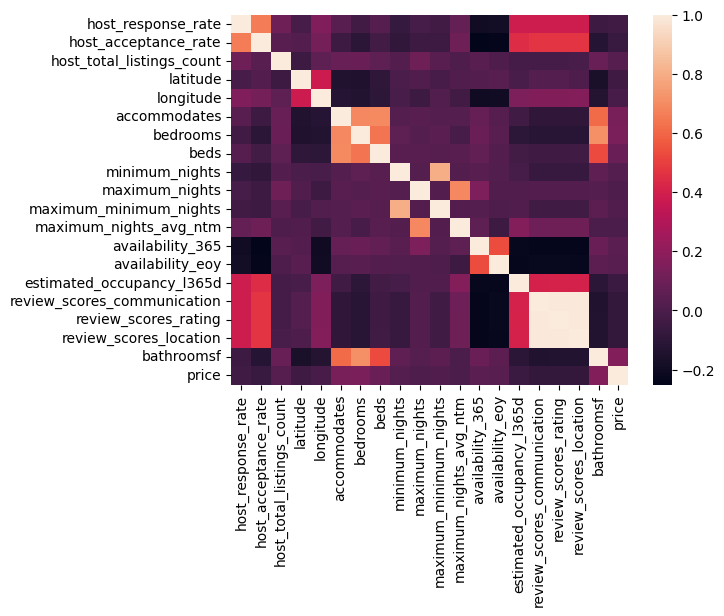

In [ ]:
df_continuo=df[['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'maximum_minimum_nights',
       'maximum_nights_avg_ntm', 'availability_365', 'availability_eoy',
       'estimated_occupancy_l365d',
       'review_scores_communication',"review_scores_rating", 'review_scores_location',
        'bathroomsf', 'price']]
#Ver correlacion entre datos 
corr = df_continuo.corr()[y_reg].sort_values(ascending=False)
#sns.heatmap(corr.to_frame(), cmap="Blues", annot=True)
print(corr)
# Ver dispersion y tendencia entre variables x y y
#Definir variables x totales. LISTA
sns.heatmap(df_continuo.corr())


#### Caclular VIF eliminar aquellas con VIF >10 

In [ ]:
df_x=df.copy().drop(columns=['price'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame({
    "variable": df_x.columns,
    "VIF": [variance_inflation_factor(df_x.values, i) for i in range(df_x.shape[1])]
}).sort_values("VIF", ascending=False)

vif

,variable,VIF
5,latitude,271370.969839
6,longitude,271011.217185
19,review_scores_communication,507.046986
18,review_scores_rating,451.052133
20,review_scores_location,337.741304
24,has_wifi,28.653615
27,has_kitchen,13.580639
8,accommodates,11.482768
1,host_acceptance_rate,10.904891
16,availability_eoy,9.204149


In [ ]:
# variables con VIF
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df_x, thresh=10):
    variables = df_x.columns
    dropped = True

    while dropped:
        dropped = False
        vif = pd.DataFrame()
        vif["variable"] = variables
        vif["VIF"] = [variance_inflation_factor(df_x[variables].values, i)
                      for i in range(len(variables))]

        max_vif = vif['VIF'].max()
        if max_vif > thresh:
            max_var = vif.loc[vif['VIF'].idxmax(), 'variable']
            print(f"Eliminando {max_var} por VIF={max_vif}")
            variables = variables.drop(max_var)
            dropped = True

    print("Variables finales:")
    return variables

vars_finales = calculate_vif(df_x)

print(vars_finales)

Eliminando latitude por VIF=271370.9698386496
Eliminando review_scores_communication por VIF=505.1133546356501
Eliminando review_scores_location por VIF=256.79428016010667
Eliminando longitude por VIF=56.13241444698797
Eliminando has_wifi por VIF=19.1813557807662
Eliminando accommodates por VIF=11.471997930220107
Eliminando has_kitchen por VIF=11.17982865133524
Eliminando host_acceptance_rate por VIF=10.525302718020672
Variables finales:
Index(['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'room_type', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'maximum_minimum_nights',
       'maximum_nights_avg_ntm', 'availability_365', 'availability_eoy',
       'estimated_occupancy_l365d', 'review_scores_rating', 'instant_bookable',
       'bathroomsf', 'has_pool', 'has_free_parking', 'has_ac_heating',
       'has_jacuzzi', 'has_washer_dryer', 'has_self_checkin', 'has_tv_cable',
       'has_bbq'],
      dtype='object')


#### Definir variables con VIF <10

In [50]:
#Definir variables x continuas que entran. corr> 0,15
finales=['host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'room_type', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'maximum_minimum_nights',
       'maximum_nights_avg_ntm', 'availability_365', 'availability_eoy',
       'estimated_occupancy_l365d', 'review_scores_rating', 'instant_bookable',
       'bathroomsf', 'has_pool', 'has_free_parking', 'has_ac_heating',
       'has_jacuzzi', 'has_washer_dryer', 'has_self_checkin', 'has_tv_cable',
       'has_bbq','price']
finales_continuas = [
    'host_response_rate',
    'host_total_listings_count',
    'bedrooms',
    'beds',
    'minimum_nights',
    'maximum_nights',
    'maximum_minimum_nights',
    'maximum_nights_avg_ntm',
    'availability_365',
    'availability_eoy',
    'estimated_occupancy_l365d',
    'review_scores_rating',
    'bathroomsf',
    'price'
]

finales_categoricas=['host_is_superhost',
 'host_identity_verified',
 'room_type',
 'instant_bookable',
 'has_pool',
 'has_free_parking',
 'has_ac_heating',
 'has_jacuzzi',
 'has_washer_dryer',
 'has_self_checkin',
 'has_tv_cable',
 'has_bbq']

df_x_final=df[finales_continuas]

In [44]:
corr = df_x_final.corr()[y_reg].sort_values(ascending=False)
print(corr)

price                        1.000000
bathroomsf                   0.163368
bedrooms                     0.137520
beds                         0.091196
availability_365             0.047486
availability_eoy             0.034805
host_total_listings_count    0.032450
minimum_nights               0.023717
maximum_minimum_nights       0.008796
maximum_nights               0.004665
maximum_nights_avg_ntm      -0.005612
host_response_rate          -0.038408
estimated_occupancy_l365d   -0.058629
review_scores_rating        -0.080820
Name: price, dtype: float64


#### Analisis categoricas

In [ ]:
#ANOVA para ver relevancia estadistica de variables 

import statsmodels.api as sm
from statsmodels.formula.api import ols

modelo = ols("price ~ C(neighbourhood_cleansed)", data=df).fit()
sm.stats.anova_lm(modelo, typ=2) 


#### Seleccionar variables x iniciales

In [ ]:

#crear nuevo dataframe con variables relevantes
datos=df[finales].copy()

#Dividir variables x numericas
x_num= [col for col in finales_continuas if col != 'price']
#Dividir variables x categoricas
x_cat=finales_categoricas

#### Generar preprocesamiento de datos --> estandarizar numericas

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

preprocesamiento = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), x_num),   # escalo solo las continuas
        # las categóricas (0/1) pasan sin tocarse
    ],
    remainder="passthrough"   # deja pasar x_cat y cualquier otra que no esté en x_num
)

# Modelos de regresion- precios

#### Dividir test y train

#### Estandarizar datos (Se asume que categoricos ya esta en dummies)

In [ ]:
'1. Dividir test y train'
#  Definir X e y
y = datos["price"].copy()
X = datos[x_num + x_cat].copy()

# 4. Dividir en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True )

'2. Estandarizar x num (se asume que categoricos ya estan en dummies)'
# Ajustar el preprocesador con datos de entrenamiento
preprocesamiento.fit(X_train)

# Transformar train y test --> estandariza
X_train_proc = preprocesamiento.transform(X_train)
X_test_proc = preprocesamiento.transform(X_test)



### Modelos de clasificacion- alquilar o no

In [ ]:
print ()